In [27]:
import os

import pandas as pd
import seaborn as sns
import numpy as np

In [28]:
df_results = pd.DataFrame()
for f in [f for f in os.listdir('../results/') if 'cnn' in f]:
    df_results = pd.concat((df_results,pd.read_csv(f'../results/{f}')))

df_results.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
df_results.loc[
    (~df_results['train_synth_ratio'].isna()) & 
    (df_results['transform']=='minimal')
]

,epoch,test_losses,train_losses,test_accuracies,train_accuracies,train_synth_ratio,transform,sim_num,category
0,0,0.819315,0.945484,0.582031,0.538737,NonDemented1.0_0.2__VeryMildDemented1.0_0.2__M...,minimal,0,minimal_NonDemented1.0_0.2__VeryMildDemented1....
1,1,0.424803,0.587047,0.837500,0.749349,NonDemented1.0_0.2__VeryMildDemented1.0_0.2__M...,minimal,0,minimal_NonDemented1.0_0.2__VeryMildDemented1....
2,2,0.194499,0.260169,0.931250,0.902995,NonDemented1.0_0.2__VeryMildDemented1.0_0.2__M...,minimal,0,minimal_NonDemented1.0_0.2__VeryMildDemented1....
3,3,0.302614,0.089838,0.909375,0.967448,NonDemented1.0_0.2__VeryMildDemented1.0_0.2__M...,minimal,0,minimal_NonDemented1.0_0.2__VeryMildDemented1....
4,4,0.154905,0.056482,0.950781,0.981445,NonDemented1.0_0.2__VeryMildDemented1.0_0.2__M...,minimal,0,minimal_NonDemented1.0_0.2__VeryMildDemented1....
...,...,...,...,...,...,...,...,...,...
295,10,0.297738,0.016071,0.937500,0.995117,NonDemented0.8_0.2__VeryMildDemented0.8_0.2__M...,minimal,19,minimal_NonDemented0.8_0.2__VeryMildDemented0....
296,11,0.288970,0.025959,0.940625,0.990039,NonDemented0.8_0.2__VeryMildDemented0.8_0.2__M...,minimal,19,minimal_NonDemented0.8_0.2__VeryMildDemented0....
297,12,0.296939,0.017742,0.933594,0.994922,NonDemented0.8_0.2__VeryMildDemented0.8_0.2__M...,minimal,19,minimal_NonDemented0.8_0.2__VeryMildDemented0....
298,13,0.357177,0.025047,0.907031,0.991992,NonDemented0.8_0.2__VeryMildDemented0.8_0.2__M...,minimal,19,minimal_NonDemented0.8_0.2__VeryMildDemented0....


<Axes: xlabel='epoch', ylabel='test_losses'>

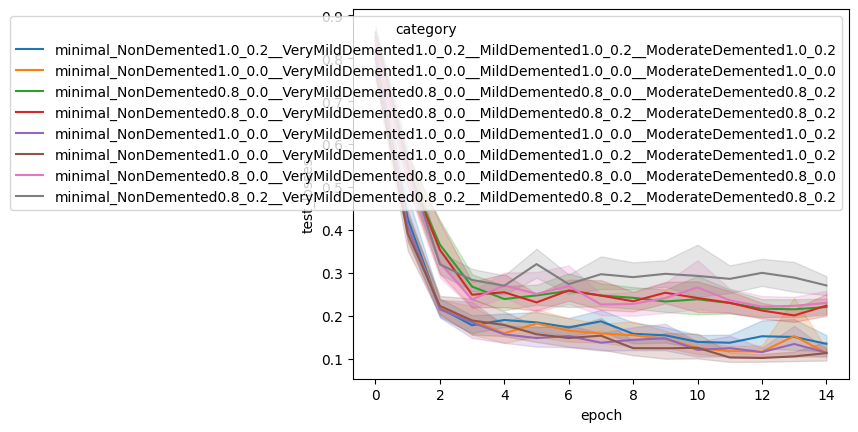

In [30]:
sns.lineplot(
    data=df_results.loc[
        (~df_results['train_synth_ratio'].isna()) & 
        (df_results['transform']=='minimal')],
    x='epoch',
    y='test_losses',
    hue='category'
)

In [33]:
df_results.loc[
    (~df_results['train_synth_ratio'].isna()) & 
    (df_results['transform']=='auto') &
    (df_results['train_synth_ratio']=='NonDemented1.0_0.2__VeryMildDemented1.0_0.2__MildDemented1.0_0.2__ModerateDemented1.0_0.2') &
    (df_results['epoch']>=14),
    ['test_losses']
].median()

test_losses    0.178442
dtype: float64